<a href="https://colab.research.google.com/github/ykitaguchi77/CorneAI/blob/main/CorneAI_GradCAM%E8%AB%96%E6%96%87_Figure_250721.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**YOLOv5_GradCAM_CutPaste_Figure**

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


#**Figure S1**

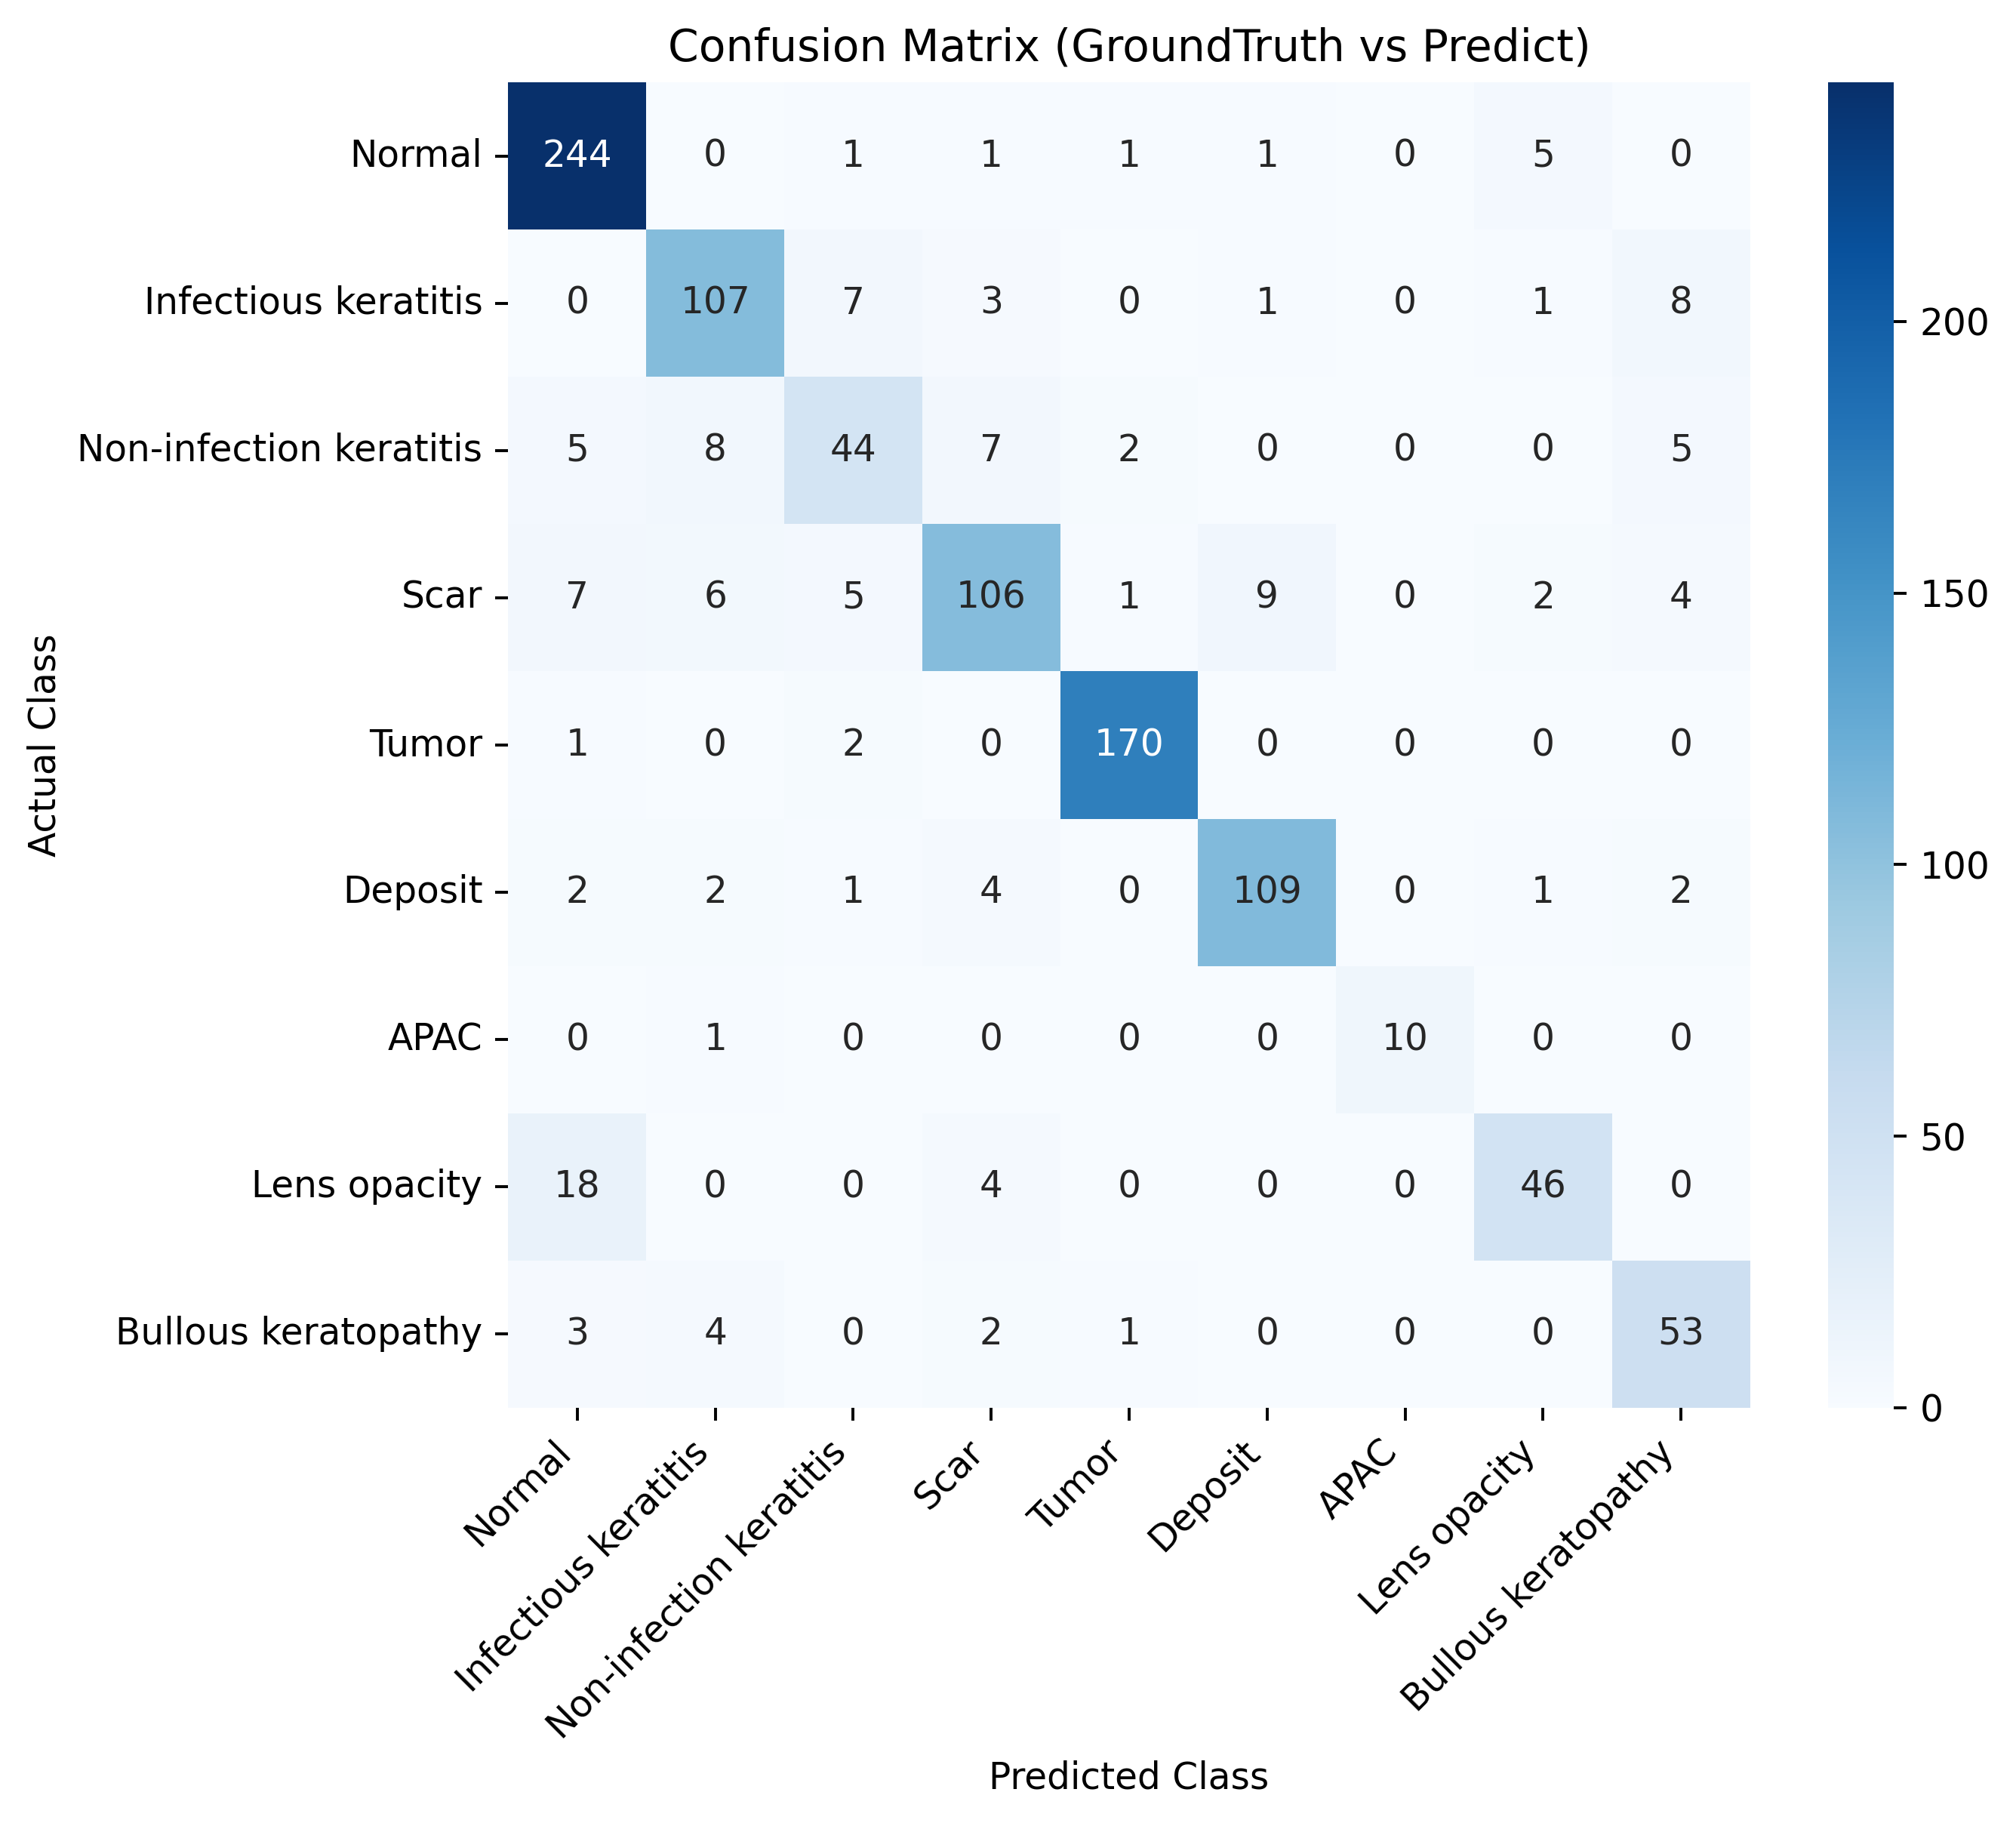

In [4]:
# ────────────────────────────────────────────────────────────────
# Confusion Matrix  —  GroundTruth vs Predict  (Grad‑CAM dataset)
# ────────────────────────────────────────────────────────────────
#
# ❶  CSV  ファイルを読み込む
# ❷  GroundTruth / Predict をラベル文字列に変換
# ❸  pandas.crosstab で混同行列を作成
# ❹  seaborn.heatmap で描画・保存（350 dpi）
# ────────────────────────────────────────────────────────────────

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- ❶  CSVパス（Google Drive 等に合わせて変更してください） ---
file_path = '/gdrive/MyDrive/研究/進行中の研究/角膜スマートフォンAIプロジェクト/Ueno_Mix1039/Ueno_Mix1039_gradcam++.csv'

# エンコーディングに注意（latin‑1 だと読み込めるケースが多い）
df = pd.read_csv(file_path, encoding='latin1')

# --- ❷  ラベルマッピング ---------------------------------------
label_map = {
    'normal'         : 'Normal',
    'infection'      : 'Infectious keratitis',
    'non-infection'  : 'Non-infection keratitis',
    'scar'           : 'Scar',
    'tumor'          : 'Tumor',
    'deposit'        : 'Deposit',
    'APAC'           : 'APAC',
    'lens opacity'   : 'Lens opacity',
    'bullous'        : 'Bullous keratopathy'
}

df['gt_label']   = df['GroundTruth'].map(label_map)
df['pred_label'] = df['Predict'].map(label_map)

# クラス表示順（縦横そろえておくと読める混同行列になる）
class_names = [
    'Normal',
    'Infectious keratitis',
    'Non-infection keratitis',
    'Scar',
    'Tumor',
    'Deposit',
    'APAC',
    'Lens opacity',
    'Bullous keratopathy'
]

# --- ❸  混同行列 ----------------------------------------------
conf_matrix = (
    pd.crosstab(df['gt_label'], df['pred_label'])
      .reindex(index=class_names, columns=class_names, fill_value=0)
)

# --- ❹  プロット ----------------------------------------------
plt.figure(figsize=(8, 7), dpi=350)
sns.heatmap(conf_matrix,
            annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix (GroundTruth vs Predict)')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('confusion_matrix_gradcam_350dpi.png', dpi=350, bbox_inches='tight')
plt.show()
